# Simple Linear Regression (basic overview)
### This excercise shows the basics of the Linear Regression algorithm using:
- MSE and Gradient Descent
- One feature
- Code written in Python

Linear regression is a fundamental statistical technique used in data analysis and machine learning for modeling the relationship between a dependent variable (label) and one or more independent variables (features). It is a versatile tool with applications in various fields, from economics to biology and beyond.

### How Linear Regression Works:

1. Data Collection: Start by collecting a dataset with both labels and features. This process is also known as data-generating process.

2. Model Building: Choose the appropriate type of linear regression (simple or multiple) based on the problem at hand. Calculate the best-fitting line using techniques like the least squares method.

3. Model Evaluation: Assess the goodness of fit by examining metrics such as the coefficient of determination (R-squared), which tells you how well the model explains the variance in the data.

4. Prediction: Once you have a reliable model, you can use it to make predictions. For instance, you can predict house prices for new properties based on their sizes using the established linear relationship.

## 1. Data-generating process
The training and test data are generated by a probability distribution over datasets called the data-generating process. We tipically make a set of assumptions known collectively as the i.i.d. assumptions. These assumptions are that the examples in each dataset are independent from each other, and that the traning set and test set are identically distributed drawn from the same probability distribution as each other.

For this excercise we will use the library *sklearn.datasets* to generate the training and test sets.

In [287]:
#Import necessary libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [289]:
#Data-generating
X, y = make_regression(n_samples = 150, n_features = 1, random_state = 42, noise = 50)

print(f" X.shape = {X.shape}")
print(f" y.shape = {y.shape}")

 X.shape = (150, 1)
 y.shape = (150,)


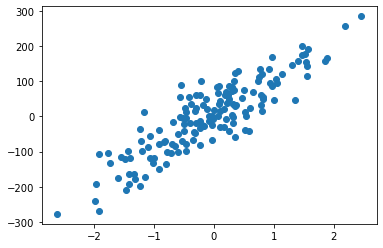

In [291]:
# EDA - Exploratory Data Analysis
plt.scatter(X, y)
plt.show()

### Split dataset into training and test sets

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .10, random_state = 42)

print(f" X_train.shape = {X_train.shape}")
print(f" y_train.shape = {y_train.shape}")

 X_train.shape = (135, 1)
 y_train.shape = (135,)


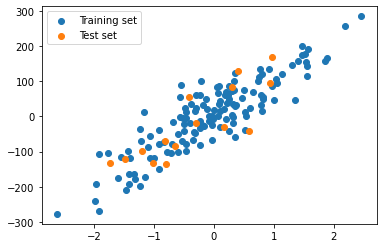

In [295]:
plt.scatter(X_train, y_train, label="Training set")
plt.scatter(X_test, y_test, label="Test set")
plt.legend()

## Model building

**Linear regression** assumes a linear relationship between the label and feature variables. This means that we believe the relationship can be expressed as a straight line equation:

$f(x) = wx + b$

#### Initialize a random *w* and a random *b*. This task will allow us to define a starting point to optimize the weigths and bias and find the model that better fits the training data set.

In [301]:
m, n = X_train.shape
y_train = y_train.reshape(m, 1)
w = np.random.rand(1)
b = np.random.rand(1)

print(f"X_train shape={X_train.shape}")
print(f"y_train shape={y_train.shape}")
print(f"m={m}")
print(f"w={w}")
print(f"b={b}")

X_train shape=(135, 1)
y_train shape=(135, 1)
m=135
w=[0.89389793]
b=[0.45829251]


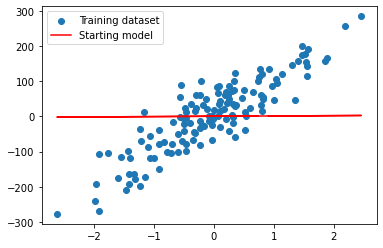

In [303]:
plt.scatter(X_train, y_train, label = "Training dataset")
plt.plot(X_train, np.dot(X_train, w) + b, color="red", label="Starting model")
plt.legend()
plt.show()

Now that it is defined how the label will be predicted from the feature using the model $\hat{y} = wx + b$ we need a definition of our performance measure. One way of measuring the performance of the model is to compute the **mean squared error** of the model on the test set. If $\hat{y}$ gives the predictions of the model on the test set, then the mean squared error is given by

$MSE_{test}=J(w,b)=\frac{1}{2m}\sum_{i}^{m}(f_{w,b}(x^{(i)})-y^{(i)})^{2}$

This measure is called the **cost** **$J(w,b)$** and intuitively, one can see that this error measure decreases to 0 when $\hat{y} = y$. We can also see that the error increases whenever the Euclidean distance between the predictions and the targets increases.

We need to improve the weights **w** in a way that reduces $MSE_{test}$. One intuitive way of doing this is just to minimize the mean squared error on the training set. To minimize the cost function and find the global minimum we will use the gradient descent.

The **gradient descent** algorithm is described as *repeat until convergence:*

$w=w-\alpha\frac{\delta J(w,b)}{\delta w}$

$b=b-\alpha\frac{\delta J(w,b)}{\delta b}$

where parameters $w, b$ are updated simultaneously and $\alpha$ is the learning rate.

Until now we have: 

- **Linear regression model**: $f_{w,b}(x) = wx + b$
- **Cost function**: $J(w,b) = \frac{1}{2m}\sum_{i=1}^{m}(f_{w,b}(x^{(i)})-y_{(i)})^{2}$
- **Gradient descent algorithm**

    $w=w-\alpha\frac{\delta J(w,b)}{\delta w}$

    $b=b-\alpha\frac{\delta J(w,b)}{\delta b}$

Now, let's do some math to get $\frac{\delta J(w,b)}{\delta w}$

\begin{equation}
= \frac{\delta}{\delta w}\frac{1}{2m}\sum_{i=1}^{m}(f_{w,b}(x^{(i)})-y^{(i)})^{2} \\ 
= \frac{\delta}{\delta w}\frac{1}{2m}\sum_{i=1}^{m}(wx^{(i)}+b-y^{(i)})^{2} \\
= \frac{1}{2m}\sum_{i=1}^{m}(wx^{(i)}+b-y^{(i)})2x^{(i)} \\
= \frac{1}{m}\sum_{i=1}^{m}(f_{w,b}(x^{(i)})-y^{(i)})x^{(i)}
\end{equation}

Now, to get $\frac{\delta J(w,b)}{\delta b}$

\begin{equation}
= \frac{\delta}{\delta b}\frac{1}{2m}\sum_{i=1}^{m}(f_{w,b}(x^{(i)})-y^{(i)})^{2} \\ 
= \frac{\delta}{\delta b}\frac{1}{2m}\sum_{i=1}^{m}(wx^{(i)}+b-y^{(i)})^{2} \\
= \frac{1}{2m}\sum_{i=1}^{m}(wx^{(i)}+b-y^{(i)})2 \\
= \frac{1}{m}\sum_{i=1}^{m}(f_{w,b}(x^{(i)})-y^{(i)})
\end{equation}

### Code implementation
To implement the Linear Regression using gradient descent and MSE, we will need the next functions:
- function to compute the cost
- function to compute the gradient
- function to compute the gradient descent (fit)

In [305]:
def compute_cost(X, y, w, b, m):
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * X[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum += cost  
    total_cost = (1 / (2 * m)) * cost_sum
    
    return total_cost

In [307]:
def compute_gradient(X, y, w, b, m):
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * X[i] + b 
        dj_dw_i = (f_wb - y[i]) * X[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [313]:
def fit(X, y, w, b, m, learning_rate, epochs):
    W = np.array([])
    B = np.array([])
    L = np.array([])

    working_w = w
    working_b = b

    for epoch in range(epochs):
        dj_dw, dj_db = compute_gradient(X,y,working_w, working_b, m)
        
        working_w = working_w - learning_rate * dj_dw
        working_b = working_b - learning_rate * dj_db

        loss = compute_cost(X, y, working_w, working_b, m)
                        
        L = np.append(L, loss)
        W = np.append(W, working_w)
        B = np.append(B, working_b)
        
    return working_w, working_b, L, W, B

In [325]:
optimized_w, optimized_b, cost_h, w_h, b_h = fit(X_train, y_train, w, b, m, 0.1, 100)

print(optimized_w)
print(optimized_b)

[97.20911222]
[8.58244015]


### Plotting the cost function and the progress history of the gradient descent

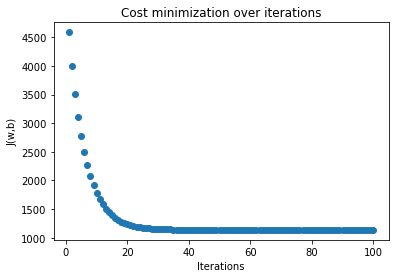

In [333]:
plt.scatter(np.linspace(1, 100, 100), cost_h)
plt.title("Cost minimization over iterations")
plt.xlabel("Iterations")
plt.ylabel("J(w,b)")
plt.show()

Text(0, 0.5, 'J(w,b)')

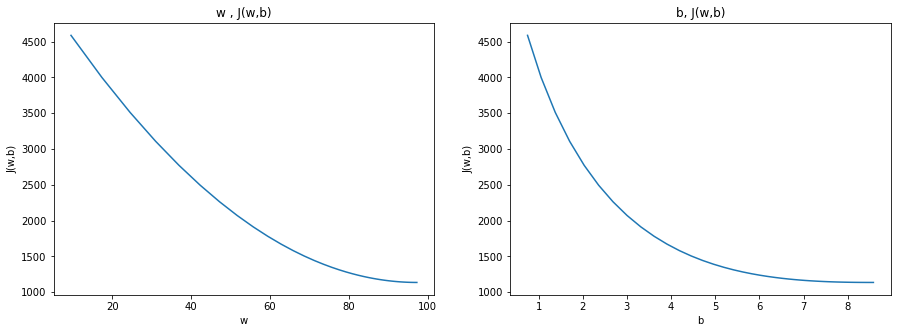

In [335]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(w_h, cost_h)
axes[0].set_title('w , J(w,b)')
axes[0].set_xlabel('w')
axes[0].set_ylabel('J(w,b)')

axes[1].plot(b_h, cost_h)
axes[1].set_title('b, J(w,b)')
axes[1].set_xlabel('b')
axes[1].set_ylabel('J(w,b)')

### Definition of prediction function using the model

In [338]:
def predict(X):
  return np.dot(X, 97.20911222) + 8.58244015

### Test the model

<function matplotlib.pyplot.show(close=None, block=None)>

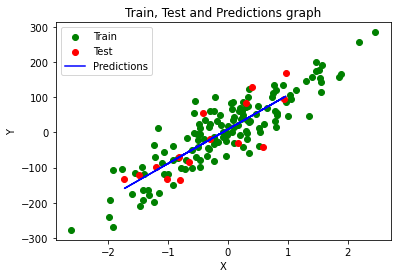

In [340]:
plt.scatter(X_train, y_train, color="green", label="Train")
plt.scatter(X_test, y_test, color="red", label="Test")
plt.plot(X_test, predict(X_test), color="blue", label="Predictions")

plt.title("Train, Test and Predictions graph")
plt.xlabel("X")
plt.ylabel("Y")

plt.legend(loc='upper left')

plt.show

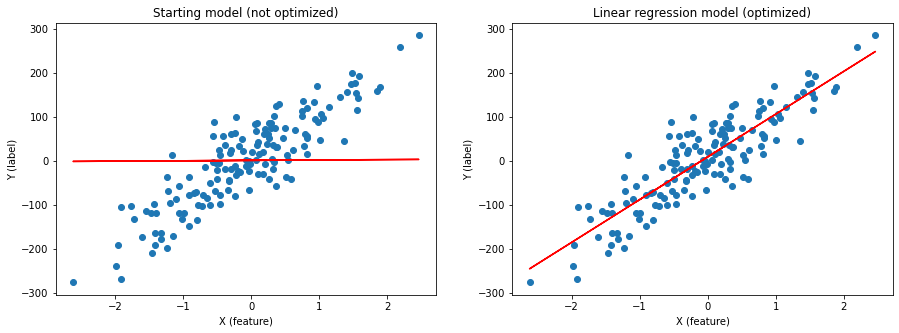

In [350]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(X, y)
axes[0].plot(X, np.dot(X, w) + b, color="red")
axes[0].set_title('Starting model (not optimized)')
axes[0].set_xlabel('X (feature)')
axes[0].set_ylabel('Y (label)')

axes[1].scatter(X,y)
axes[1].plot(X, predict(X), c = "r")
axes[1].set_title('Linear regression model (optimized)')
axes[1].set_xlabel('X (feature)')
axes[1].set_ylabel('Y (label)')

plt.show()


### Linear regression model ($feature \to f(x)\to prediction$)




\begin{equation}
f(x)=wx+b \\
\hat{y}=wx+b \\
\hat{y}=97.20911222x+8.58244015
\end{equation}

# Final comments
While linear regression is a powerful tool, it has limitations. It assumes a linear relationship, which may not hold for all problems. Additionally, it can be sensitive to outliers and may not perform well when the data has a complex, nonlinear structure.

In conclusion, linear regression is a foundational technique in data analysis and machine learning that helps us model relationships between variables and make predictions. It's a valuable tool in a data scientist's toolkit and serves as a basis for more advanced regression techniques.

Linear regression has a wide range of applications:

- Finance: Predicting stock prices based on historical data.
- Marketing: Analyzing the impact of advertising expenditure on sales.
- Medicine: Predicting patient outcomes based on clinical variables.
- Environmental Science: Studying the relationship between pollution levels and health effects.

In future posts I will come with: 
- the metrics to evaluate the model, 
- a code implementation to use optimized algorithms to operate over vectors and matrix

Thank you for reading and happy coding!


## References

[1] A. Géron, "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow," O'Reilly Media, Inc., Oct. 2022.

[2] I. Goodfellow, Y. Bengio, and A. Courville, "Deep Learning," The MIT Press.